# Data Mining: Homework 1 - Data Pre Processing
### Parsa KamaliPour - 97149081

## Import the required Packages

In [3]:
from copy import deepcopy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display_functions import display
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## 1. read the social_network_ads.csv file and print the top 10 of it's records

In [4]:
social_net_ads = pd.read_csv("Social_Network_Ads.csv")

display(social_net_ads)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
first_10_record = social_net_ads.head(n=10)
display(first_10_record)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [6]:
x_di = social_net_ads[['EstimatedSalary']].values
y_di = social_net_ads[['Age']].values


Text(0, 0.5, 'Estimated Salary')

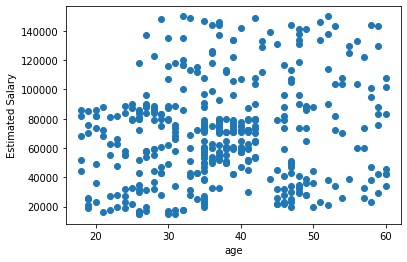

In [8]:
ax = plt.axes()
ax.scatter(x=y_di, y=x_di)
plt.xlabel("age")
plt.ylabel("Estimated Salary")

## 2. Select columns "Age" & "EstimatedSalary" and normalize them:

### 2.1. normalize without using sklearn & it's preprocessing class

In [9]:
def z_score_calculator(org_val:float, mean:float, standard_deviation:float) -> float:
    return (org_val - mean) / standard_deviation

age = social_net_ads[['Age']].values
estimated_salary = social_net_ads[['EstimatedSalary']].values

# display(age)
# display(estimated_salary)

In [10]:
age_mean = age.mean()
age_standard_deviation = np.std(age)

print("age mean: ", age_mean)
print("age standard deviation: ",age_standard_deviation)

for i in range(len(age)):
    age[i] = z_score_calculator(age[i], age_mean, age_standard_deviation)

# display(age)

age mean:  37.655
age standard deviation:  10.46976480156073


In [11]:
estimated_salary_mean = estimated_salary.mean()
estimated_salary_standard_deviation = np.std(estimated_salary)

print("estimated_salary mean: ", estimated_salary_mean)
print("estimated_salary standard deviation: ",estimated_salary_standard_deviation)

for i in range(len(estimated_salary)):
    estimated_salary[i] = z_score_calculator(estimated_salary[i], estimated_salary_mean, estimated_salary_standard_deviation)

# display(estimated_salary)

estimated_salary mean:  69742.5
estimated_salary standard deviation:  34054.3124104716


In [12]:
normal1_social_net = deepcopy(social_net_ads)

normal1_social_net[['Age']] = age
normal1_social_net[['EstimatedSalary']] = estimated_salary

display(normal1_social_net)
display(social_net_ads)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,-1,-1,0
1,15810944,Male,0,-1,0
2,15668575,Female,-1,0,0
3,15603246,Female,-1,0,0
4,15804002,Male,-1,0,0
...,...,...,...,...,...
395,15691863,Female,0,0,1
396,15706071,Male,1,-1,1
397,15654296,Female,1,-1,1
398,15755018,Male,0,-1,0


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [13]:
first_10_record = normal1_social_net.head(n=10)
display(first_10_record)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,-1,-1,0
1,15810944,Male,0,-1,0
2,15668575,Female,-1,0,0
3,15603246,Female,-1,0,0
4,15804002,Male,-1,0,0
5,15728773,Male,-1,0,0
6,15598044,Female,-1,0,0
7,15694829,Female,0,2,1
8,15600575,Male,-1,-1,0
9,15727311,Female,0,0,0


Text(0, 0.5, 'Estimated Salary')

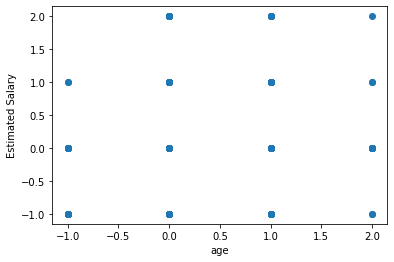

In [14]:
x_di = normal1_social_net[['EstimatedSalary']].values
y_di = normal1_social_net[['Age']].values

ax = plt.axes()
ax.scatter(x=y_di, y=x_di)
plt.xlabel("age")
plt.ylabel("Estimated Salary")

### 2.2. normalize using sklearn & it's preprocessing class

In [15]:
age = social_net_ads[['Age']].values
estimated_salary = social_net_ads[['EstimatedSalary']].values


In [16]:
scaler = StandardScaler()
scaler.fit(age)
print(scaler.mean_)
age = scaler.transform(age)


[37.655]


In [17]:
scaler = StandardScaler()
scaler.fit(estimated_salary)
print(scaler.mean_)
estimated_salary = scaler.transform(estimated_salary)

[69742.5]


In [18]:
normal2_social_net = deepcopy(social_net_ads)

normal2_social_net[['Age']] = age
normal2_social_net[['EstimatedSalary']] = estimated_salary

display(normal2_social_net)
display(social_net_ads)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,-1.781797,-1.490046,0
1,15810944,Male,-0.253587,-1.460681,0
2,15668575,Female,-1.113206,-0.785290,0
3,15603246,Female,-1.017692,-0.374182,0
4,15804002,Male,-1.781797,0.183751,0
...,...,...,...,...,...
395,15691863,Female,0.797057,-0.844019,1
396,15706071,Male,1.274623,-1.372587,1
397,15654296,Female,1.179110,-1.460681,1
398,15755018,Male,-0.158074,-1.078938,0


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [19]:
first_10_record = normal2_social_net.head(n=10)
display(first_10_record)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,-1.781797,-1.490046,0
1,15810944,Male,-0.253587,-1.460681,0
2,15668575,Female,-1.113206,-0.785290,0
3,15603246,Female,-1.017692,-0.374182,0
4,15804002,Male,-1.781797,0.183751,0
5,15728773,Male,-1.017692,-0.344817,0
6,15598044,Female,-1.017692,0.418669,0
7,15694829,Female,-0.540127,2.356750,1
8,15600575,Male,-1.208719,-1.078938,0
9,15727311,Female,-0.253587,-0.139263,0


Text(0, 0.5, 'Estimated Salary')

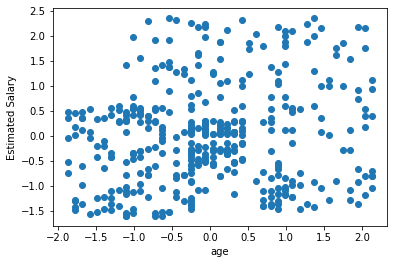

In [20]:
x_di = normal2_social_net[['EstimatedSalary']].values
y_di = normal2_social_net[['Age']].values

ax = plt.axes()
ax.scatter(x=y_di, y=x_di)
plt.xlabel("age")
plt.ylabel("Estimated Salary")

## 3. Select columns “Age” & “EstimatedSalary” and scale them to 0:10 range:

In [27]:
age = normal2_social_net[['Age']].values
estimated_salary = normal2_social_net[['EstimatedSalary']].values


In [28]:
mms = MinMaxScaler(feature_range=(0, 10))
mms.fit(age)
print(mms.data_max_)
age = mms.transform(age)

[2.13424088]


In [29]:
mms = MinMaxScaler(feature_range=(0, 10))
mms.fit(estimated_salary)
print(mms.data_max_)
estimated_salary = mms.transform(estimated_salary)

[2.35674998]


In [30]:
min_max_social_net = deepcopy(social_net_ads)

min_max_social_net[['Age']] = age
min_max_social_net[['EstimatedSalary']] = estimated_salary

display(min_max_social_net)
display(social_net_ads)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,0.238095,0.296296,0
1,15810944,Male,4.047619,0.370370,0
2,15668575,Female,1.904762,2.074074,0
3,15603246,Female,2.142857,3.111111,0
4,15804002,Male,0.238095,4.518519,0
...,...,...,...,...,...
395,15691863,Female,6.666667,1.925926,1
396,15706071,Male,7.857143,0.592593,1
397,15654296,Female,7.619048,0.370370,1
398,15755018,Male,4.285714,1.333333,0


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [31]:
first_10_record = min_max_social_net.head(n=10)
display(first_10_record)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,0.238095,0.296296,0
1,15810944,Male,4.047619,0.370370,0
2,15668575,Female,1.904762,2.074074,0
3,15603246,Female,2.142857,3.111111,0
4,15804002,Male,0.238095,4.518519,0
5,15728773,Male,2.142857,3.185185,0
6,15598044,Female,2.142857,5.111111,0
7,15694829,Female,3.333333,10.000000,1
8,15600575,Male,1.666667,1.333333,0
9,15727311,Female,4.047619,3.703704,0


Text(0, 0.5, 'Estimated Salary')

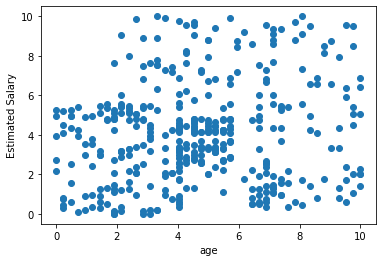

In [32]:
x_di = min_max_social_net[['EstimatedSalary']].values
y_di = min_max_social_net[['Age']].values

ax = plt.axes()
ax.scatter(x=y_di, y=x_di)
plt.xlabel("age")
plt.ylabel("Estimated Salary")